<a href="https://colab.research.google.com/github/Guilherme-dL/EconoFinPyR/blob/main/Op%C3%A7%C3%B5es%20-%20Black%26Scholes_e_Gregas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Black&Scholes e as Gregas:

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as si
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,5)
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['figure.titlesize'] = 20
sns.set()

## Black&Scholes:

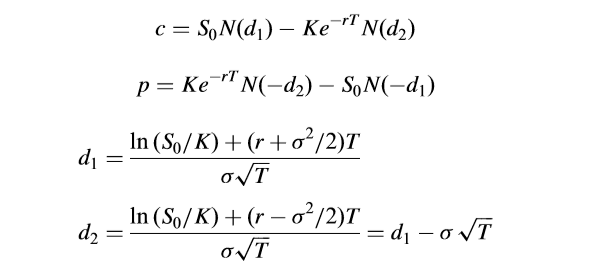

In [2]:
def blackScholes(S,K,T,r,sigma,opttype = 'C'):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  try:
    if opttype == 'C':
      preço = S*si.norm.cdf(d1,0,1) - K*np.exp(-r*(T))*si.norm.cdf(d2,0,1)
    elif opttype == 'P':
      preço = K*np.exp(-r*(T))*si.norm.cdf(-d2,0,1) - S*si.norm.cdf(-d1,0,1)
    return preço
  except:
    print('Parâmetros inválidos')

## Gregas:

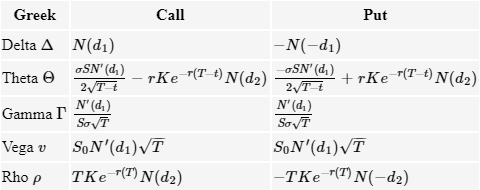

### Delta:

In [ ]:
# Delta:
# if 'C':
#   Delta = si.norm.cdf(d1)
# elif 'P':
#   Delta = si.norm.cdf(d1) - 1
def bs_Delta(S,K,T,r,sigma,opttype = 'C'):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  if opttype == 'C':
    Delta = si.norm.cdf(d1)
  elif opttype == 'P':
    Delta = si.norm.cdf(d1) - 1
  return Delta 

### Gamma:

In [ ]:
# Gamma:
# Gamma = (si.norm.pdf(d1))/(S*sigma*np.sqrt(T)) 

In [ ]:
def bs_Gamma(S,K,T,r,sigma):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  Gamma = (si.norm.pdf(d1))/(S*sigma*np.sqrt(T))
  return Gamma 

### Vega:

In [ ]:
# Vega:
# Vega = (S*si.norm.pdf(d1)*np.sqrt(T))/100

In [ ]:
def bs_Vega(S,K,T,r,sigma):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  Vega = (S*si.norm.pdf(d1)*np.sqrt(T))/100
  return Vega 

### Theta:

In [ ]:
# Theta:
# if 'C':
#   Theta = (-((S*si.norm.pdf(d1)*sigma)/(2*np.sqrt(T))) - r*K*np.exp(-r*T)*si.norm.cdf(d2))/360
# elif 'P':
#   Theta = (-(S*si.norm.pdf(d1)*sigma)/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*si.norm.cdf(-d2))/360

In [ ]:
def bs_Theta(S,K,T,r,sigma,opttype = 'C'):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  if opttype == 'C':
    Theta = (-((S*si.norm.pdf(d1)*sigma)/(2*np.sqrt(T))) - r*K*np.exp(-r*T)*si.norm.cdf(d2))/360
  elif opttype == 'P':
    Theta = (-(S*si.norm.pdf(d1)*sigma)/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*si.norm.cdf(-d2))/360
  return Theta 

### Rho:

In [ ]:
# Rho:
# if 'C':
#   Rho = (K*T*np.exp(-r*T)*si.norm.cdf(d2))/100
# elif 'P':
#   Rho = (-K*T*np.exp(-r*T)*si.norm.cdf(-d2))/100

In [ ]:
def bs_Rho(S,K,T,r,sigma,opttype = 'C'):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  if opttype == 'C':
    Rho = (K*T*np.exp(-r*T)*si.norm.cdf(d2))/100
  elif opttype == 'P':
    Rho = (-K*T*np.exp(-r*T)*si.norm.cdf(-d2))/100
  return Rho 

### Função Black&Scholes Gregas:

In [ ]:
def bs_greeks(S,K,T,r,sigma,opttype='C'):
  d1 = (np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  # N  =  função cumulativa da distribuição normal padrão
  # N' =  função densidade de probabilidade
  try:
    if opttype == 'C':
      Delta = si.norm.cdf(d1)
      Gamma = (si.norm.pdf(d1))/(S*sigma*np.sqrt(T)) 
      Vega = (S*si.norm.pdf(d1)*np.sqrt(T))/100
      Theta = (-((S*si.norm.pdf(d1)*sigma)/(2*np.sqrt(T))) - r*K*np.exp(-r*T)*si.norm.cdf(d2))/360
      Rho = (K*T*np.exp(-r*T)*si.norm.cdf(d2))/100
    elif opttype == 'P':
      Delta = si.norm.cdf(d1) - 1
      Gamma = (si.norm.pdf(d1))/(S*sigma*np.sqrt(T)) 
      Vega = (S*si.norm.pdf(d1)*np.sqrt(T))/100
      Theta = (-(S*si.norm.pdf(d1)*sigma)/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*si.norm.cdf(-d2))/360
      Rho = (-K*T*np.exp(-r*T)*si.norm.cdf(-d2))/100
  except:
    print('Parâmetros inválidos')
  print('Delta:',round(Delta,4))
  print('Theta:',round(Theta,4))
  print('Gamma:',round(Gamma,4))
  print('Vega:',round(Vega,4))
  print('Rho:',round(Rho,4))

### Evolução das Gregas Conforme Preço do Ativo Objeto:

In [5]:
BS_GreeksSim = pd.DataFrame()
Delta = []
Theta = []
Gamma = []
Vega = []
Rho = []
Price = []
K = 100
T = 1
r = 0.05
sigma = 0.20
for S in range(50,150):
  d1 = (np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
  Price.append(S)
  Delta.append(si.norm.cdf(d1))
  Gamma.append((si.norm.pdf(d1))/(S*sigma*np.sqrt(T))) 
  Vega.append((S*si.norm.pdf(d1)*np.sqrt(T))/100)
  Theta.append((-((S*si.norm.pdf(d1)*sigma)/(2*np.sqrt(T))) - r*K*np.exp(-r*T)*si.norm.cdf(d2))/360)
  Rho.append((K*T*np.exp(-r*T)*si.norm.cdf(d2))/100)
BS_GreeksSim['Price'] = Price
BS_GreeksSim['Delta'] = Delta
BS_GreeksSim['Theta'] = Theta
BS_GreeksSim['Gamma'] = Gamma
BS_GreeksSim['Vega'] = Vega
BS_GreeksSim['Rho'] = Rho
BS_GreeksSim.set_index(BS_GreeksSim['Price'],inplace=True)
BS_GreeksSim.drop(columns=['Price'],inplace=True)

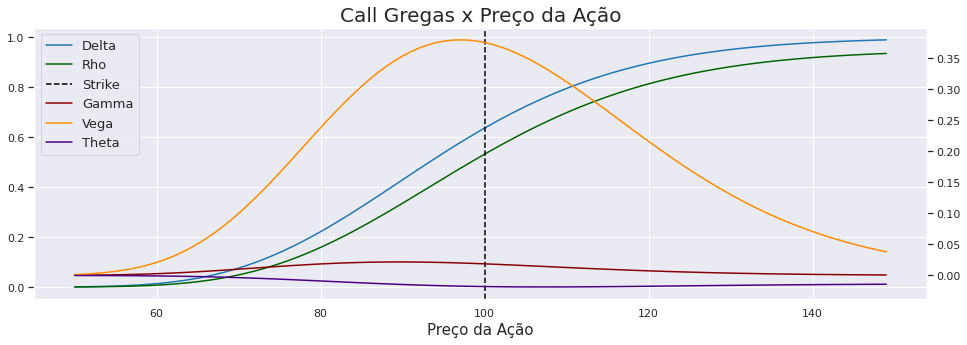

In [11]:
figure, axis_1 = plt.subplots()
axis_1.plot(range(50,150),BS_GreeksSim['Delta'], color='tab:blue', label='Delta')
axis_1.plot(range(50,150),BS_GreeksSim['Rho'], color='darkgreen', label='Rho')
axis_2 = axis_1.twinx()
axis_2.plot(range(50,150),BS_GreeksSim['Gamma'], color='darkred', label='Gamma')
axis_2.plot(range(50,150),BS_GreeksSim['Vega'], color='darkorange', label='Vega')
axis_2.plot(range(50,150),BS_GreeksSim['Theta'], color='indigo', label='Theta')
axis_1.set_title('Call Gregas x Preço da Ação',fontsize=20)
axis_1.set_xlabel('Preço da Ação',fontsize=15)
axis_1.axvline(x=100,color='black',ls='--',label='Strike')
axis_2.grid(b=None)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
axis_1.legend(lines, labels, loc='upper left',fontsize=13)
plt.show()